# Advanced styling

This tutorial notebook shows the user some advanced styling features of Logomaker. We begin with some useful imports

In [1]:
import sys
sys.path.append('../../')
import logomaker as lm

## Fade probabilities

We first introduce the keyword argument `fade_probabilities` of the [Logo](https://logomaker.readthedocs.io/en/latest/Logo.html) class: if this is set to True, the characters in each stack will be assigned a transparency (alpha) value equal to their height. This option only makes sense if matrix input to the Logo class is a probability matrix. We demonstrate the use of this keyword argument by first loading the CRP counts matrix ... 

In [2]:
crp_df = lm.get_example_matrix('crp_counts_matrix', print_description=False)

... and then transforming the counts matrix to a probability matrix:

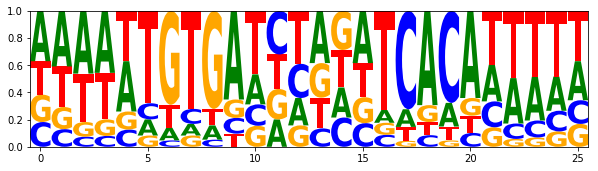

In [3]:
# counts matrix -> Probability matrix
prob_mat = lm.transform_matrix(crp_df, from_type='counts', to_type='probability')
logo = lm.Logo(prob_mat)

We can now use the fade probabilities keyword argument as follows:

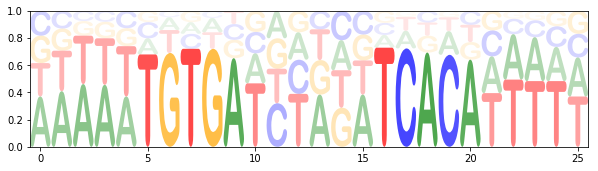

In [4]:
logo = lm.Logo(prob_mat, 
               fade_probabilities=True,
               stack_order='small_on_top',
               font_name='Arial Rounded MT Bold')

Here we have also set the keyword argument `stack_order=small_on_top`, which stack glyphs away from x-axis in order of decreasing absolute value. The default stack order value is `big_on_top`. Another allowed value is `fixed` which stacks glyphs from top to bottom in the order that characters appear in the data frame.

## Style glyphs in sequence

In the faded probability logo shown above, the nucleotides 'TGTA' and 'TCACA' at positions 5-10 and 16-20, respectively, occur with high probability. We can use the Logomaker method `style_glyphs_in_sequence` to restyle those nucleotides in the logo (e.g. to place more emphasis on them). 

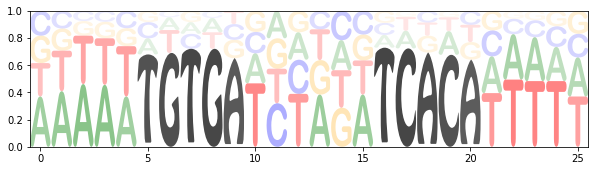

In [5]:
logo = lm.Logo(prob_mat, 
               fade_probabilities=True,
               stack_order='small_on_top',
               font_name='Arial Rounded MT Bold')

logo.style_glyphs_in_sequence('.....TGTGA......TCACA.....',
                              color='black', font_name='Hobo Std')

## vpad

To leave whitespace above and below each character within that character's bounding box, we can use the keyword argument *vpad*. Note that, if vpad > 0, the height of the character's bounding box (and not of the character itself) will correspond to values in df.

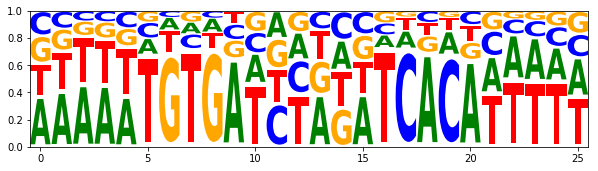

In [6]:
logo = lm.Logo(df=prob_mat,vpad=0.1, stack_order='small_on_top')

## vsep

To leave whitespace between the bounding boxes of rendered characters, we use the keyword argument *vsep*. Unlike vpad, vsep is not relative to character height.

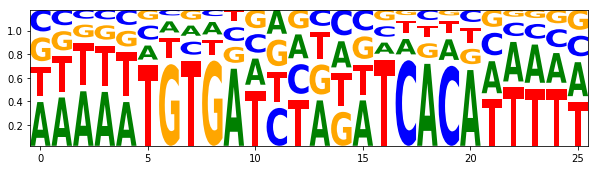

In [7]:
logo = lm.Logo(df=prob_mat,vsep=0.05, stack_order='small_on_top')

## Style xticks
To style xticks, we can use the method `style_xticks`, as shown below. 

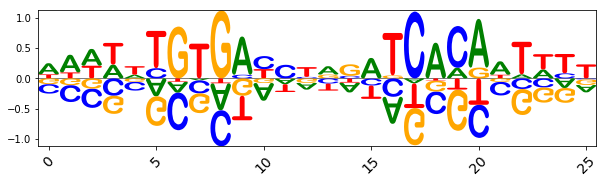

In [8]:
crp_energy_df = lm.get_example_matrix('crp_energy_matrix', print_description=False)

logo = lm.Logo(df=-crp_energy_df,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')

logo.style_xticks(spacing=5, anchor=25, rotation=45, fmt='%d', fontsize=14)

## Draw baseline

We can draw and style the baseline by calling the method *draw_baseline()*  

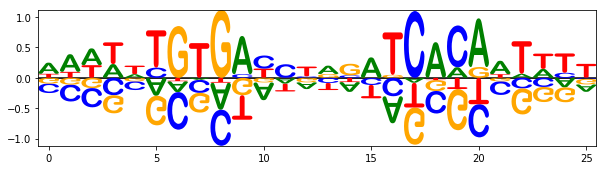

In [9]:
logo = lm.Logo(df=-crp_energy_df,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')

logo.draw_baseline(linewidth=2,color='black',alpha=0.75)

## Style Spines

We can choose which spines to include by using the [style_splines()](https://logomaker.readthedocs.io/en/latest/Logo.html#logomaker.Logo.style_spines) method. The allowed values for the spines parameter include ('left','right','bottom','top')

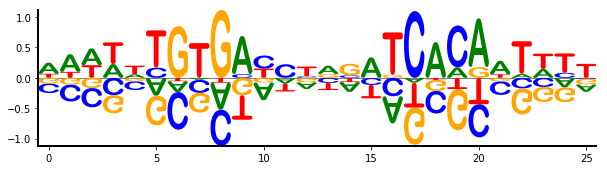

In [10]:
logo = lm.Logo(df=-crp_energy_df,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')

# style logo spines
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True, linewidth=2)

## Highligh position ranges

We can also draw rectangles at certain positions to emphasize certain positions by using the method `highlight_position_range`

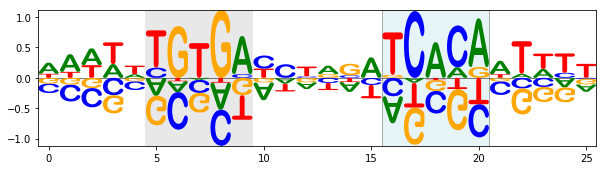

In [11]:
logo = lm.Logo(df=-crp_energy_df,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')
logo.highlight_position_range(5,9,alpha=0.5,color='lightgray')
logo.highlight_position_range(16,20,alpha=0.3,color='lightblue',edgecolor='black')

## Highlight single position
Alternatively, we can use `highlight_position` to highlight single positions. 

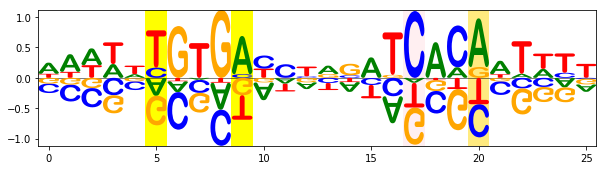

In [12]:
logo = lm.Logo(df=-crp_energy_df,
              center_values=True,
              font_name = 'Arial Rounded MT Bold')

logo.highlight_position(5)
logo.highlight_position(9)

logo.highlight_position(17,color='pink',alpha=0.25)
logo.highlight_position(20,color='gold',alpha=0.5)